In [6]:
from sklearn.model_selection import train_test_split
import pandas as pd
df = pd.read_csv('../data/original_data.csv', encoding= 'utf-8')

X = df.iloc[:,2:]
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=70)

df1 = pd.concat([y_train, X_train], axis=1)
df2 = pd.concat([y_test, X_test], axis=1)
print(df1)
print(df2)


train=df1
test=df2
train_X = train.iloc[:,1:]
train_Y = train.iloc[:,0]

test_X = test.iloc[:,1:]
test_Y = test.iloc[:,0]

      label  feature_1646  feature_3311  feature_823  feature_2622  \
1298      2      0.195822     -0.001304     0.075993     -0.543089   
397       1     -0.259028     -0.093580    -0.008047     -0.405936   
826       1     -0.176236     -0.117599    -0.029108     -0.215507   
813       5      0.029588      0.028172    -0.019457     -0.784942   
656       1     -0.037237     -0.089272    -0.154446     -0.457979   
...     ...           ...           ...          ...           ...   
1083      4     -0.288116      0.053761     0.264770     -0.564404   
1340      3      0.083617      0.306775    -0.102341     -0.538136   
1138      1      0.013422     -0.125086    -0.191565     -0.402310   
214       4      0.114238     -0.023022    -0.183670     -0.558893   
1358      1     -0.056952      0.012198    -0.090202     -0.764764   

      feature_2571  feature_1790  feature_3254  feature_1044  feature_1618  \
1298      0.042775      0.027024      0.058707     -0.093237     -0.011285   
397

In [7]:
import xgboost as xgb
xg_train = xgb.DMatrix(train_X, label=train_Y)
xg_test = xgb.DMatrix(test_X, label=test_Y)
# setup parameters for xgboost
accuracy=[]
UAR=[]
f1=[]
for i in [10,20,30,40,50,60,70]:
    param = {}
    # use softmax multi-class classification
    param['objective'] = 'multi:softmax'
    # scale weight of positive examples
    param['eta'] = 1
    param['max_depth'] = 6
    #param['silent'] = 1
    param['nthread'] = 4
    param['num_class'] = 8

    watchlist = [(xg_train, 'train'), (xg_test, 'test')]
    num_round = i
    bst = xgb.train(param, xg_train, num_round, watchlist);
    # get prediction
    pred = bst.predict(xg_test)

    import numpy as np
    error_rate = np.sum(pred != test_Y) / len(test_Y)
    accuracy_rate=1-error_rate
    accuracy.append(accuracy_rate)
    print('Test accuracy using softmax = {}'.format(accuracy_rate))

    predl=pred.tolist()
    test_Yl=test_Y.values.tolist()
    from sklearn.metrics import recall_score, f1_score
   # print(recall_score(test_Yl,predl,average='macro'))
    UAR.append(recall_score(test_Yl,predl,average='macro'))
    f1.append(f1_score(test_Yl,predl,average='macro'))


[0]	train-mlogloss:0.92263	test-mlogloss:1.55338


d:\python3.10\lib\site-packages\xgboost\core.py:525: FutureWarning: Pass `evals` as keyword args.  Passing these as positional arguments will be considered as error in future releases.
  warnings.warn(


[1]	train-mlogloss:0.52377	test-mlogloss:1.54206
[2]	train-mlogloss:0.30751	test-mlogloss:1.51143
[3]	train-mlogloss:0.19970	test-mlogloss:1.54139
[4]	train-mlogloss:0.13470	test-mlogloss:1.55174
[5]	train-mlogloss:0.10292	test-mlogloss:1.54486
[6]	train-mlogloss:0.07532	test-mlogloss:1.56367
[7]	train-mlogloss:0.05788	test-mlogloss:1.57336
[8]	train-mlogloss:0.04646	test-mlogloss:1.58757
[9]	train-mlogloss:0.03857	test-mlogloss:1.59814
Test accuracy using softmax = 0.5472972972972974


d:\python3.10\lib\site-packages\xgboost\core.py:525: FutureWarning: Pass `evals` as keyword args.  Passing these as positional arguments will be considered as error in future releases.
  warnings.warn(


[0]	train-mlogloss:0.92263	test-mlogloss:1.55338
[1]	train-mlogloss:0.52377	test-mlogloss:1.54206
[2]	train-mlogloss:0.30751	test-mlogloss:1.51143
[3]	train-mlogloss:0.19970	test-mlogloss:1.54139
[4]	train-mlogloss:0.13470	test-mlogloss:1.55174
[5]	train-mlogloss:0.10292	test-mlogloss:1.54486
[6]	train-mlogloss:0.07532	test-mlogloss:1.56367
[7]	train-mlogloss:0.05788	test-mlogloss:1.57336
[8]	train-mlogloss:0.04646	test-mlogloss:1.58757
[9]	train-mlogloss:0.03857	test-mlogloss:1.59814
[10]	train-mlogloss:0.03216	test-mlogloss:1.61805
[11]	train-mlogloss:0.02800	test-mlogloss:1.62922
[12]	train-mlogloss:0.02429	test-mlogloss:1.62804
[13]	train-mlogloss:0.02171	test-mlogloss:1.64380
[14]	train-mlogloss:0.01960	test-mlogloss:1.65304
[15]	train-mlogloss:0.01816	test-mlogloss:1.65464
[16]	train-mlogloss:0.01675	test-mlogloss:1.65778
[17]	train-mlogloss:0.01562	test-mlogloss:1.66407
[18]	train-mlogloss:0.01459	test-mlogloss:1.67718
[19]	train-mlogloss:0.01366	test-mlogloss:1.68762
Test accur

d:\python3.10\lib\site-packages\xgboost\core.py:525: FutureWarning: Pass `evals` as keyword args.  Passing these as positional arguments will be considered as error in future releases.
  warnings.warn(


[1]	train-mlogloss:0.52377	test-mlogloss:1.54206
[2]	train-mlogloss:0.30751	test-mlogloss:1.51143
[3]	train-mlogloss:0.19970	test-mlogloss:1.54139
[4]	train-mlogloss:0.13470	test-mlogloss:1.55174
[5]	train-mlogloss:0.10292	test-mlogloss:1.54486
[6]	train-mlogloss:0.07532	test-mlogloss:1.56367
[7]	train-mlogloss:0.05788	test-mlogloss:1.57336
[8]	train-mlogloss:0.04646	test-mlogloss:1.58757
[9]	train-mlogloss:0.03857	test-mlogloss:1.59814
[10]	train-mlogloss:0.03216	test-mlogloss:1.61805
[11]	train-mlogloss:0.02800	test-mlogloss:1.62922
[12]	train-mlogloss:0.02429	test-mlogloss:1.62804
[13]	train-mlogloss:0.02171	test-mlogloss:1.64380
[14]	train-mlogloss:0.01960	test-mlogloss:1.65304
[15]	train-mlogloss:0.01816	test-mlogloss:1.65464
[16]	train-mlogloss:0.01675	test-mlogloss:1.65778
[17]	train-mlogloss:0.01562	test-mlogloss:1.66407
[18]	train-mlogloss:0.01459	test-mlogloss:1.67718
[19]	train-mlogloss:0.01366	test-mlogloss:1.68762
[20]	train-mlogloss:0.01292	test-mlogloss:1.68313
[21]	trai

d:\python3.10\lib\site-packages\xgboost\core.py:525: FutureWarning: Pass `evals` as keyword args.  Passing these as positional arguments will be considered as error in future releases.
  warnings.warn(


[1]	train-mlogloss:0.52377	test-mlogloss:1.54206
[2]	train-mlogloss:0.30751	test-mlogloss:1.51143
[3]	train-mlogloss:0.19970	test-mlogloss:1.54139
[4]	train-mlogloss:0.13470	test-mlogloss:1.55174
[5]	train-mlogloss:0.10292	test-mlogloss:1.54486
[6]	train-mlogloss:0.07532	test-mlogloss:1.56367
[7]	train-mlogloss:0.05788	test-mlogloss:1.57336
[8]	train-mlogloss:0.04646	test-mlogloss:1.58757
[9]	train-mlogloss:0.03857	test-mlogloss:1.59814
[10]	train-mlogloss:0.03216	test-mlogloss:1.61805
[11]	train-mlogloss:0.02800	test-mlogloss:1.62922
[12]	train-mlogloss:0.02429	test-mlogloss:1.62804
[13]	train-mlogloss:0.02171	test-mlogloss:1.64380
[14]	train-mlogloss:0.01960	test-mlogloss:1.65304
[15]	train-mlogloss:0.01816	test-mlogloss:1.65464
[16]	train-mlogloss:0.01675	test-mlogloss:1.65778
[17]	train-mlogloss:0.01562	test-mlogloss:1.66407
[18]	train-mlogloss:0.01459	test-mlogloss:1.67718
[19]	train-mlogloss:0.01366	test-mlogloss:1.68762
[20]	train-mlogloss:0.01292	test-mlogloss:1.68313
[21]	trai

d:\python3.10\lib\site-packages\xgboost\core.py:525: FutureWarning: Pass `evals` as keyword args.  Passing these as positional arguments will be considered as error in future releases.
  warnings.warn(


[1]	train-mlogloss:0.52377	test-mlogloss:1.54206
[2]	train-mlogloss:0.30751	test-mlogloss:1.51143
[3]	train-mlogloss:0.19970	test-mlogloss:1.54139
[4]	train-mlogloss:0.13470	test-mlogloss:1.55174
[5]	train-mlogloss:0.10292	test-mlogloss:1.54486
[6]	train-mlogloss:0.07532	test-mlogloss:1.56367
[7]	train-mlogloss:0.05788	test-mlogloss:1.57336
[8]	train-mlogloss:0.04646	test-mlogloss:1.58757
[9]	train-mlogloss:0.03857	test-mlogloss:1.59814
[10]	train-mlogloss:0.03216	test-mlogloss:1.61805
[11]	train-mlogloss:0.02800	test-mlogloss:1.62922
[12]	train-mlogloss:0.02429	test-mlogloss:1.62804
[13]	train-mlogloss:0.02171	test-mlogloss:1.64380
[14]	train-mlogloss:0.01960	test-mlogloss:1.65304
[15]	train-mlogloss:0.01816	test-mlogloss:1.65464
[16]	train-mlogloss:0.01675	test-mlogloss:1.65778
[17]	train-mlogloss:0.01562	test-mlogloss:1.66407
[18]	train-mlogloss:0.01459	test-mlogloss:1.67718
[19]	train-mlogloss:0.01366	test-mlogloss:1.68762
[20]	train-mlogloss:0.01292	test-mlogloss:1.68313
[21]	trai

d:\python3.10\lib\site-packages\xgboost\core.py:525: FutureWarning: Pass `evals` as keyword args.  Passing these as positional arguments will be considered as error in future releases.
  warnings.warn(


[1]	train-mlogloss:0.52377	test-mlogloss:1.54206
[2]	train-mlogloss:0.30751	test-mlogloss:1.51143
[3]	train-mlogloss:0.19970	test-mlogloss:1.54139
[4]	train-mlogloss:0.13470	test-mlogloss:1.55174
[5]	train-mlogloss:0.10292	test-mlogloss:1.54486
[6]	train-mlogloss:0.07532	test-mlogloss:1.56367
[7]	train-mlogloss:0.05788	test-mlogloss:1.57336
[8]	train-mlogloss:0.04646	test-mlogloss:1.58757
[9]	train-mlogloss:0.03857	test-mlogloss:1.59814
[10]	train-mlogloss:0.03216	test-mlogloss:1.61805
[11]	train-mlogloss:0.02800	test-mlogloss:1.62922
[12]	train-mlogloss:0.02429	test-mlogloss:1.62804
[13]	train-mlogloss:0.02171	test-mlogloss:1.64380
[14]	train-mlogloss:0.01960	test-mlogloss:1.65304
[15]	train-mlogloss:0.01816	test-mlogloss:1.65464
[16]	train-mlogloss:0.01675	test-mlogloss:1.65778
[17]	train-mlogloss:0.01562	test-mlogloss:1.66407
[18]	train-mlogloss:0.01459	test-mlogloss:1.67718
[19]	train-mlogloss:0.01366	test-mlogloss:1.68762
[20]	train-mlogloss:0.01292	test-mlogloss:1.68313
[21]	trai

d:\python3.10\lib\site-packages\xgboost\core.py:525: FutureWarning: Pass `evals` as keyword args.  Passing these as positional arguments will be considered as error in future releases.
  warnings.warn(


[2]	train-mlogloss:0.30751	test-mlogloss:1.51143
[3]	train-mlogloss:0.19970	test-mlogloss:1.54139
[4]	train-mlogloss:0.13470	test-mlogloss:1.55174
[5]	train-mlogloss:0.10292	test-mlogloss:1.54486
[6]	train-mlogloss:0.07532	test-mlogloss:1.56367
[7]	train-mlogloss:0.05788	test-mlogloss:1.57336
[8]	train-mlogloss:0.04646	test-mlogloss:1.58757
[9]	train-mlogloss:0.03857	test-mlogloss:1.59814
[10]	train-mlogloss:0.03216	test-mlogloss:1.61805
[11]	train-mlogloss:0.02800	test-mlogloss:1.62922
[12]	train-mlogloss:0.02429	test-mlogloss:1.62804
[13]	train-mlogloss:0.02171	test-mlogloss:1.64380
[14]	train-mlogloss:0.01960	test-mlogloss:1.65304
[15]	train-mlogloss:0.01816	test-mlogloss:1.65464
[16]	train-mlogloss:0.01675	test-mlogloss:1.65778
[17]	train-mlogloss:0.01562	test-mlogloss:1.66407
[18]	train-mlogloss:0.01459	test-mlogloss:1.67718
[19]	train-mlogloss:0.01366	test-mlogloss:1.68762
[20]	train-mlogloss:0.01292	test-mlogloss:1.68313
[21]	train-mlogloss:0.01225	test-mlogloss:1.69207
[22]	tra

In [8]:
print(accuracy)
print(UAR)
print(f1)

[0.5472972972972974, 0.5912162162162162, 0.6013513513513513, 0.6081081081081081, 0.6047297297297297, 0.6013513513513513, 0.597972972972973]
[0.3345210442168879, 0.36327862070208833, 0.3709999433252342, 0.398659865473552, 0.38080272261640913, 0.37804464310001756, 0.370691701923547]
[0.3653714687315503, 0.39918935291300506, 0.4064331142419598, 0.4430387484829014, 0.41888354691493423, 0.41358807645220236, 0.40397677439894303]


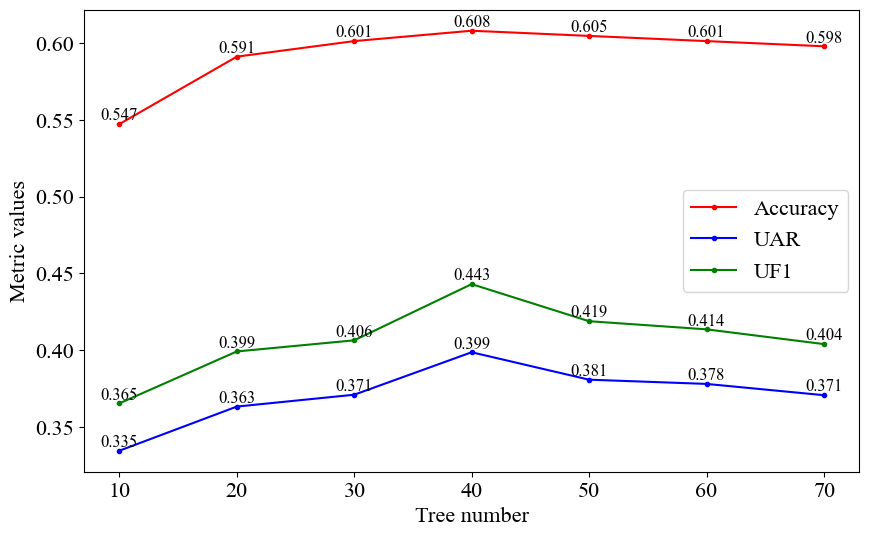

<Figure size 640x480 with 0 Axes>

In [9]:
import matplotlib
import matplotlib.pyplot as plt
depth_trees = [10,20,30,40,50,60,70]
plt.rcParams['font.family'] = 'Times New Roman' # 设置字体样式
plt.rcParams['font.size'] = '16' # 设置字体大小
fig = plt.figure(figsize=(10,6))
plt.plot(depth_trees, accuracy, 'r.-', depth_trees, UAR, 'b.-', depth_trees, f1, 'g.-')
plt.xlabel('Tree number')
plt.ylabel('Metric values')
setx = [10,20,30,40,50,60,70]
plt.xticks(setx)
plt.legend(['Accuracy', 'UAR', 'UF1'])

for i in range(len(accuracy)):
    plt.text(depth_trees[i], accuracy[i], "%.3f" %accuracy[i], fontsize=12, verticalalignment="bottom",horizontalalignment="center")
    plt.text(depth_trees[i], UAR[i], "%.3f" %UAR[i], fontsize=12, verticalalignment="bottom",horizontalalignment="center")
    plt.text(depth_trees[i], f1[i], "%.3f" %f1[i], fontsize=12, verticalalignment="bottom",horizontalalignment="center")
plt.show()
plt.savefig("num.jpg")